In [37]:
#loading required package for data wrangling, reading and pre-processing
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
library(purrr)


In [84]:
#download the heart and disease data from online 

hd_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data",delim=",", col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")) #assign the column name accordingly with the given column names from online data base
hd_data

                                                                        

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0
32,1,2,125,254,0,0,155,0,0,?,?,?,0
33,1,3,120,298,0,0,185,0,0,?,?,?,0


In [89]:
#Choosing the predicting variables that we are going to use to predict the class type(avoid using slop,ca,thl because they have missing values)
process_hd_data<-hd_data|>
#choosing the predicting variables and class variable
select(c(age,chol,trestbps,thalach,oldpeak,num))|>
#filter out any missing values
filter(age!="?",chol!="?",trestbps!="?",thalach!="?",oldpeak!="?",num!="?")|>
#change the type of the data to factor because the class variable we predicting should be categorical
mutate(num=as.factor(num))|>
#change the type of the data to dbl because the predicting variables we predicting should be double
mutate(across(c(age, chol, trestbps, thalach, oldpeak), as.integer))|>
mutate(Prognosis= case_when(num == "0" ~ "positive",num == "1" ~ "negative"))|>
print(20)

process_hd_data

# A tibble: 270 × 7
     age  chol
   <int> <int>
 1    28   132
 2    29   243
 3    30   237
 4    31   219
 5    32   198
 6    32   225
 7    32   254
 8    33   298
 9    34   161
10    34   214
# ℹ 260 more rows
# ℹ 5 more
#   variables:
#   trestbps <int>,
#   thalach <int>,
#   oldpeak <int>,
#   num <fct>, …


age,chol,trestbps,thalach,oldpeak,num,Prognosis
<int>,<int>,<int>,<int>,<int>,<fct>,<chr>
28,132,130,185,0,0,positive
29,243,120,160,0,0,positive
30,237,170,170,0,0,positive
31,219,100,150,0,0,positive
32,198,105,165,0,0,positive
32,225,110,184,0,0,positive
32,254,125,155,0,0,positive
33,298,120,185,0,0,positive
34,161,130,190,0,0,positive


In [94]:
#pre-process the data by splitting into train/test set

train_test_split<-initial_split(process_hd_data, prop=0.86, strata=Prognosis) #Using 86% as training set and 14% as testing.
# Assign name to each set
train_set<-training(train_test_split)
test_set<-testing(train_test_split)


In [106]:
# calculates the lowest and maximum values for the train_set data frame's variables (age, chol, trestbps, thalach, and oldpeak). Then, we create a new data frame named summaryand puts the result inside. 
# we also count the percentages the number of observations for each level of the Prognosis variable in the process_hd_data data frame.
summary<- train_set |>
  summarize(across(c(age, chol, trestbps, thalach, oldpeak), list(min = min, max = max))) 

num_obs <- nrow(process_hd_data)
process_hd_data |>
group_by(Prognosis) |>
summarize(count = n(),percentage = n() / num_obs * 100)

summary_table


Prognosis,count,percentage
<chr>,<int>,<dbl>
negative,101,37.40741
positive,169,62.59259


age_min,age_max,chol_min,chol_max,trestbps_min,trestbps_max,thalach_min,thalach_max,oldpeak_min,oldpeak_max
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
28,65,85,603,98,200,87,190,0,5


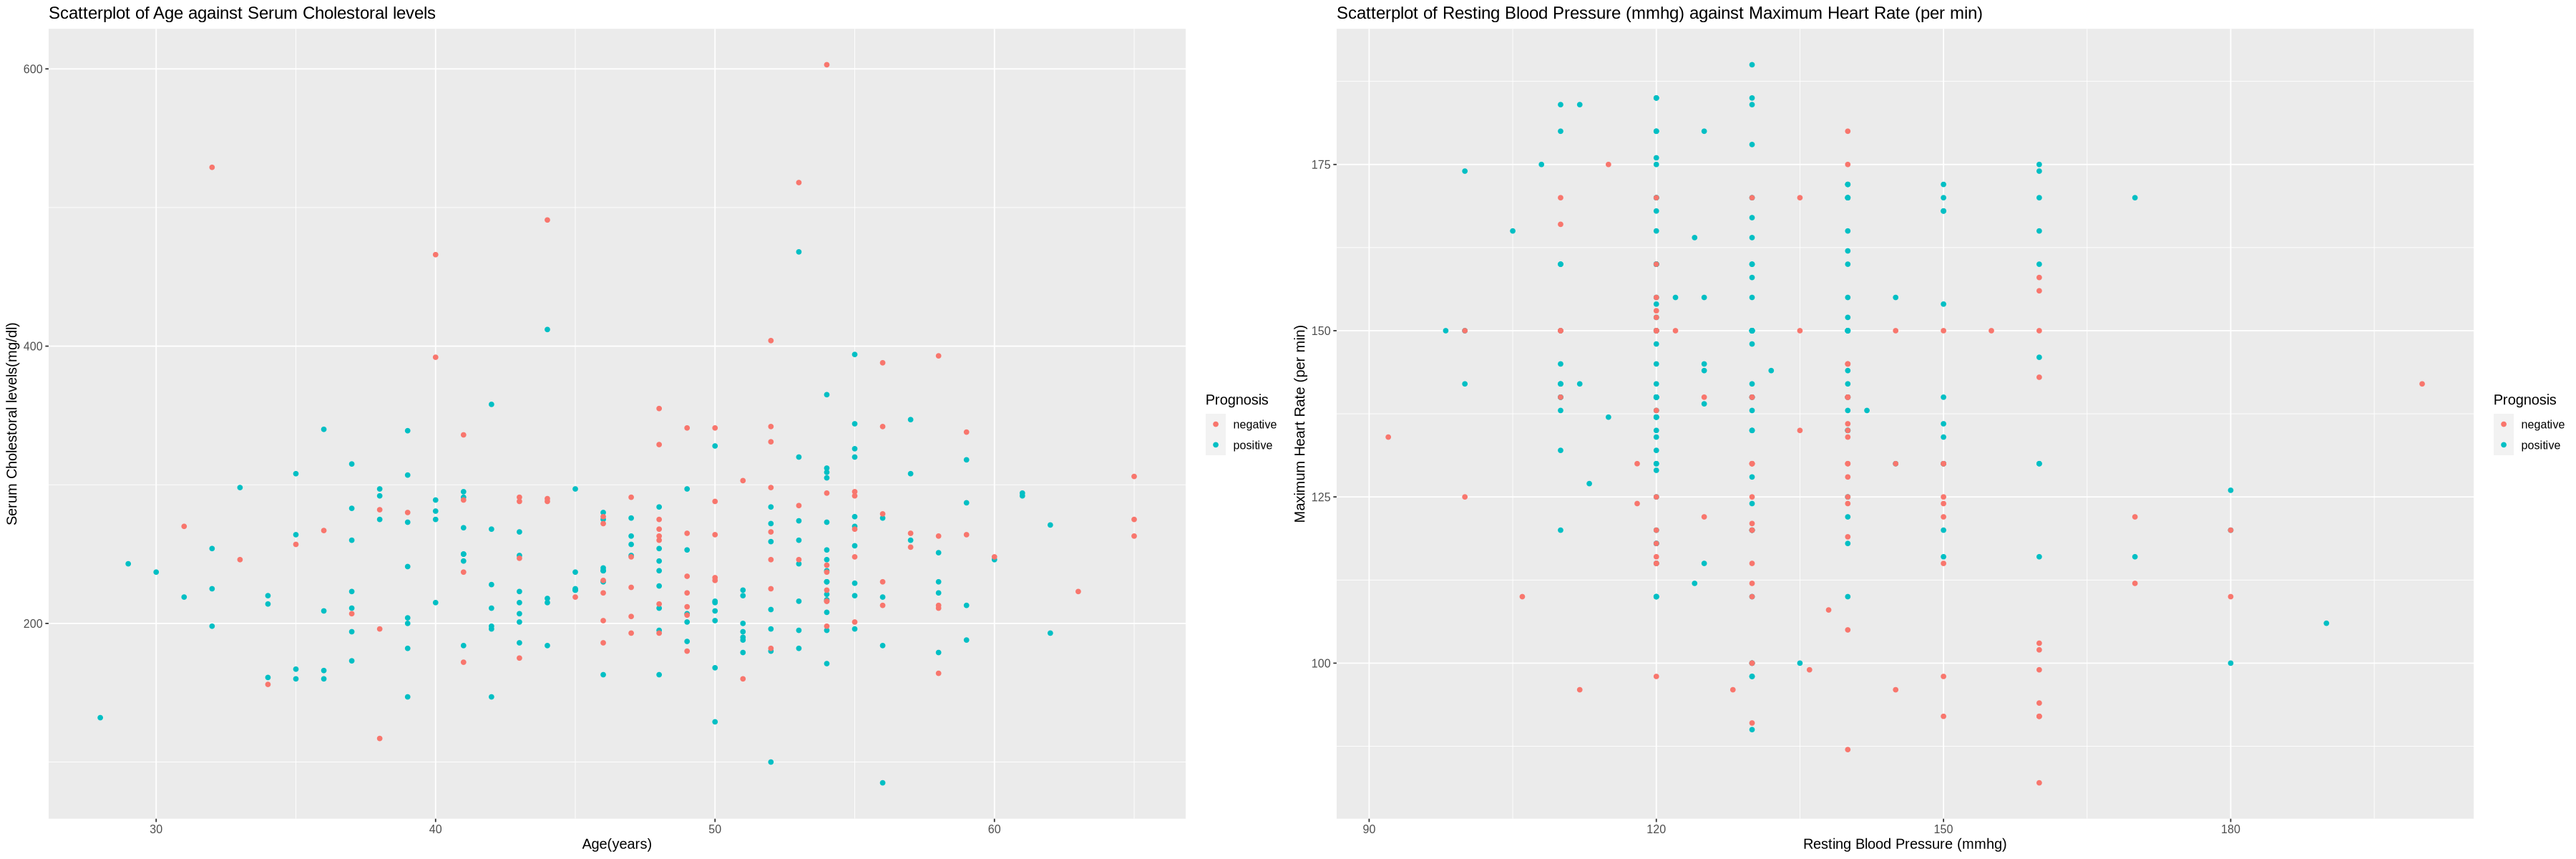

In [122]:
# create visualization of showing the distribution of Prognosis based on column that has high-variance in value 

library(ggplot2)
library(gridExtra)
options(repr.plot.width = 30, repr.plot.height = 10)

# Scatterplot for variable 'a'
plot_1 <- ggplot(process_hd_data, aes(x = age, y = chol, color = Prognosis)) +
  geom_point(alpha=3) +
  labs(title = "Scatterplot of Age against Serum Cholestoral levels",
       x = "Age(years)", y = "Serum Cholestoral levels(mg/dl)", color = "Prognosis") +
  theme(text = element_text(size = 12))



# Scatterplot for variable 'c'
plot_2 <- ggplot(process_hd_data, aes(x = trestbps, y = thalach, color = Prognosis)) +
  geom_point(alpha=3) +
  labs(title = "Scatterplot of Resting Blood Pressure (mmhg) against Maximum Heart Rate (per min)",
       x = "Resting Blood Pressure (mmhg)", y = "Maximum Heart Rate (per min)", color = "Prognosis") +
  theme(text = element_text(size = 12))


grid.arrange(plot_1,plot_2, nrow = 1)

